# Get acoustic measures from production task

Input txt files from Voicesauce and clean.
* All cleaned TextGrids should be saved in textgrids folder
* output.txt file should contain output from voicesauce run over all wav files and cleaned Textgrids with tier number 3, and number of subsegments set to 1

In [1]:
import pandas as pd
import os
from audiolabel import read_label
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import factor_analyzer as fa # factor analysis algorithm

In [2]:
df_4 = pd.read_csv("voicesauce_txt/output_LPC4.txt", sep = "\t")
df_4.head()

,Filename,Label,seg_Start,seg_End,H1c_mean,H2c_mean,H4c_mean,A1c_mean,A2c_mean,A3c_mean,...,shrF0_mean,sF1_mean,sF2_mean,sF3_mean,sF4_mean,pF1_mean,pF2_mean,pF3_mean,pF4_mean,Unnamed: 45
0,afs116_catala_exp2_a.mat,i,5808.263,5880.0,0.000,0.000,0.000,0.000,0.000,0.000,...,215.573,370.632,1022.064,2757.576,3710.802,841.155,2768.201,4036.461,4219.764,NaN
1,afs116_catala_exp2_a.mat,a,5974.435,6249.1,10.511,2.333,10.185,-12.022,5.514,2.974,...,250.642,599.884,1252.682,1647.339,3698.479,1041.290,1572.536,3588.091,4465.044,NaN
2,afs116_catala_exp2_a.mat,i,11426.143,11540.6,12.054,11.128,11.402,-9.519,1.819,26.349,...,208.054,329.584,1041.040,3249.417,4219.348,946.664,3353.907,4362.954,0.000,NaN
3,afs116_catala_exp2_a.mat,a,11790.600,12090.6,10.516,2.929,6.733,-13.412,2.009,3.168,...,260.936,626.387,1297.339,2301.141,3933.510,966.891,1574.426,3477.352,4437.865,NaN
4,afs116_catala_exp2_a.mat,i,41302.182,41500.2,12.355,7.137,11.799,-3.304,-0.731,22.468,...,216.376,369.904,1050.428,3358.187,4359.227,940.577,3371.857,4444.714,4604.958,NaN


In [3]:
df_5 = pd.read_csv("voicesauce_txt/output_LPC5.txt", sep = "\t")
df_6 = pd.read_csv("voicesauce_txt/output_LPC6.txt", sep = "\t")
df_5_fixed = pd.read_csv("voicesauce_txt/output_mistakes5.txt", sep = "\t")
df_5_odd = pd.read_csv("voicesauce_txt/output_mistakes_odd_5.txt", sep = "\t")
df_6_odd = pd.read_csv("voicesauce_txt/output_mistakes_odd_6.txt", sep = "\t")

In [4]:
print(len(df_5))
df_5 = df_5[(df_5['Filename']!='ala054_catala_exp2_d.mat') &
           (df_5['Filename']!='ala054_spanish_exp2_a.mat') &
           (df_5['Filename']!='aps124_spanish_exp2_b.mat')].copy()
df_5.reset_index(inplace = True, drop = True)
len(df_5)

19209


19116

In [5]:
print(len(df_6))
df_6 = df_6[df_6['Filename']!='dis022_english_exp2_e.mat'].copy()
df_6.reset_index(inplace = True, drop = True)
len(df_6)

7341


7288

In [6]:
df_all = pd.concat([df_4, df_5, df_6, df_5_fixed, df_5_odd, df_6_odd], ignore_index = True)
df_all.head()

,Filename,Label,seg_Start,seg_End,H1c_mean,H2c_mean,H4c_mean,A1c_mean,A2c_mean,A3c_mean,...,Unnamed: 45,sB1_mean,sB2_mean,sB3_mean,sB4_mean,pB1_mean,pB2_mean,pB3_mean,pB4_mean,Unnamed: 53
0,afs116_catala_exp2_a.mat,i,5808.263,5880.0,0.000,0.000,0.000,0.000,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,afs116_catala_exp2_a.mat,a,5974.435,6249.1,10.511,2.333,10.185,-12.022,5.514,2.974,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,afs116_catala_exp2_a.mat,i,11426.143,11540.6,12.054,11.128,11.402,-9.519,1.819,26.349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,afs116_catala_exp2_a.mat,a,11790.600,12090.6,10.516,2.929,6.733,-13.412,2.009,3.168,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,afs116_catala_exp2_a.mat,i,41302.182,41500.2,12.355,7.137,11.799,-3.304,-0.731,22.468,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Add partID and language columns.

In [7]:
df_all['partID'] = df_all['Filename'].str[:6]
df_all['Language'] = df_all['Filename'].str[7:10]

Convert times from ms to s to align with TextGrid dfs.

In [8]:
df_all['seg_Start'] = df_all['seg_Start']/1000
df_all['seg_End'] = df_all['seg_End']/1000

Count number of participants and languages. There should be 49 for Catalan (one was dropped due to poor audio quality), 50 for Spanish, and 70 for English.

In [9]:
df_all.groupby(['Language']).partID.nunique()

Language
_en     1
cat    49
eng    69
spa    50
Name: partID, dtype: int64

Change `_eng` to `eng` (one participant ID was an extra digit).

In [10]:
df_all['Language'].mask(df_all['Language'] == '_en', 'eng', inplace=True)
df_all.groupby(['Language']).partID.nunique()

Language
cat    49
eng    70
spa    50
Name: partID, dtype: int64

In [11]:
df_all['partID'].mask(df_all['partID'] == 'rsj048', 'rsj0489', inplace=True)

In [12]:
# check for files missing a vowel in one of the words
chunk = df_all.groupby(['Filename'])['Label'].count()
chunk[chunk.values%2==1]

Series([], Name: Label, dtype: int64)

Remove unnecessary columns.

In [13]:
df_all.columns

Index(['Filename', 'Label', 'seg_Start', 'seg_End', 'H1c_mean', 'H2c_mean',
       'H4c_mean', 'A1c_mean', 'A2c_mean', 'A3c_mean', 'H1H2c_mean',
       'H2H4c_mean', 'H1A1c_mean', 'H1A2c_mean', 'H1A3c_mean', 'CPP_mean',
       'Energy_mean', 'HNR05_mean', 'HNR15_mean', 'HNR25_mean', 'HNR35_mean',
       'SHR_mean', 'H1u_mean', 'H2u_mean', 'H4u_mean', 'A1u_mean', 'A2u_mean',
       'A3u_mean', 'H1H2u_mean', 'H2H4u_mean', 'H1A1u_mean', 'H1A2u_mean',
       'H1A3u_mean', 'strF0_mean', 'sF0_mean', 'pF0_mean', 'shrF0_mean',
       'sF1_mean', 'sF2_mean', 'sF3_mean', 'sF4_mean', 'pF1_mean', 'pF2_mean',
       'pF3_mean', 'pF4_mean', 'Unnamed: 45', 'sB1_mean', 'sB2_mean',
       'sB3_mean', 'sB4_mean', 'pB1_mean', 'pB2_mean', 'pB3_mean', 'pB4_mean',
       'Unnamed: 53', 'partID', 'Language'],
      dtype='object')

In [14]:
df_all.drop(['H1u_mean', 'H2u_mean', 'H4u_mean', 'A1u_mean', 'A2u_mean', 'A3u_mean', 'H1H2u_mean',
        'H2H4u_mean', 'H1A1u_mean', 'H1A2u_mean', 'H1A3u_mean', 'Unnamed: 45', 'sB1_mean',
        'sB2_mean', 'sB3_mean', 'sB4_mean', 'pB1_mean', 'pB2_mean', 'pB3_mean', 'pB4_mean',
        'Unnamed: 53'], axis = 1, inplace = True)

## Read in TextGrids for additional information

In [15]:
# create function that will take in textgrid and output df
def tg2df(filepath, wd_tier, ph_tier, vowel_tier, stress_tier, syllable_tier):
    
    if syllable_tier != 0:
        [wddf, phdf, vdf, sdf, sydf] = read_label(filepath,
            ftype='praat',
            tiers=[wd_tier, ph_tier, vowel_tier, stress_tier, syllable_tier]
        )
    else:
        [wddf, phdf, vdf, sdf] = read_label(filepath,
            ftype='praat',
            tiers=[wd_tier, ph_tier, vowel_tier, stress_tier]
        )
        
    newdf = pd.merge_asof(phdf.rename({'t1': 't1_ph', 't2': 't2_ph', 'label': "phone"},
                                        axis ='columns'),
                    wddf.drop(["fname"], axis = 1) \
                    .rename({'t1': 't1_wd', 't2': 't2_wd', "label": "word"}, axis='columns'),
                    left_on='t1_ph',
                    right_on='t1_wd')
        
    # make fname match output of voicesauce
    newdf['fname'] = newdf['fname'].str[10:-8] + 'mat'
    
    if syllable_tier != 0:
        # get duration of final s in converts
        newdf['s_dur'] = np.where((newdf['word']=='converts') & (newdf['phone']=='S'),
                         newdf['t2_ph']-newdf['t1_ph'],
                        0)
        s_durs = newdf.groupby(['t1_wd'])[['s_dur']].max()
        newdf = pd.merge(newdf, s_durs, on = 't1_wd', suffixes = ('_s', '_word'))
        newdf.drop(['s_dur_s'], axis = 1, inplace = True)
     
    # prep vowel df
    vdf = vdf[vdf['vowels']!=''].copy()
    vdf.drop(['fname', 't2'], axis = 1, inplace = True)
    vdf = vdf.rename({'t1': 't1_ph'}, axis = 'columns')
    vdf.reset_index(drop = True, inplace = True)
    
    if syllable_tier != 0:
        # prep syllable df, join to vdf
        sydf.drop(['fname'], axis = 1, inplace = True)
        sydf = sydf.rename({'t1': 't1_syl', 't2': 't2_syl'}, axis = 'columns')
        sydf = sydf[sydf['syllable']!=''].copy()
        sydf.reset_index(inplace = True, drop = True)
        sydf.drop(['syllable'], axis = 1, inplace= True)
        vdf = vdf.join(sydf)
    
        # add stress info, merge to vdf
        sdf.drop(['fname', 't2'], axis = 1, inplace = True)
        sdf = sdf.rename({'t1': 't1_ph'}, axis = 1)
        sdf = sdf[sdf['stress']!=''].copy()
        sdf.reset_index(inplace = True, drop = True)
        vdf = pd.merge(vdf, sdf, on='t1_ph')
        
        # merge to newdf
        newdf = pd.merge(newdf, vdf, on = "t1_ph")
        
        # repair syllable duration for converts, then drop extra column
        newdf['t2_wd'] = newdf['t2_wd']-newdf['s_dur_word']
        newdf['t2_syl'] = newdf['t2_syl']-newdf['s_dur_word']
        newdf.drop(['s_dur_word'], axis = 1, inplace = True)

    else:
        # merge to newdf, add syllable info
        newdf = pd.merge(newdf, vdf, on = "t1_ph", how = "outer")
        newdf['t1_syl'] = newdf['t1_ph'].shift(1).fillna(0)
        newdf['t2_syl'] = newdf['t2_ph']
        
        # drop rows without vowels
        newdf = newdf[newdf['vowels'].notna()].copy()
        
        # prep stress info, merge to newdf
        sdf.drop(['fname', 't2'], axis = 1, inplace = True)
        sdf = sdf.rename({'t1': 't1_ph'}, axis = 1)
        newdf = pd.merge(newdf, sdf, on="t1_ph")
    
    # add syllable duration and vowel duration
    newdf['syl_dur'] = newdf['t2_syl']-newdf['t1_syl']
    newdf['v_dur'] = newdf['t2_ph']-newdf['t1_ph']
    
    # drop t2_ph col
    newdf.drop(['t2_ph'], axis = 1, inplace = True)
    
    return(newdf)

In [16]:
# loop through textgrid folder and create master df
tg_folder = "textgrids/"
corpora = os.listdir(tg_folder)
df_list = []

for f in corpora:
    if f.endswith(".TextGrid"):
        filepath = tg_folder + f
    
        if "english" in f:
            wd_tier = "sentence - words"
            ph_tier = "sentence - phones"
            vowel_tier = "vowels"
            stress_tier = "stress"
            syllable_tier = "syllable"
        else:
            wd_tier = "sentence - words"
            ph_tier = "sentence - phones"
            vowel_tier = "vowels"
            stress_tier = "stress"
            syllable_tier = 0
    
        new_df = tg2df(filepath, wd_tier, ph_tier, vowel_tier, stress_tier, syllable_tier)
        df_list.append(new_df)

tg_data = pd.concat(df_list)
tg_data.sample(10)

,t1_ph,phone,fname,t1_wd,t2_wd,word,vowels,t1_syl,t2_syl,stress,syl_dur,v_dur
30,92.164879,i,anm149_spanish_exp2_b.mat,91.721400,92.311400,extermino,i,92.081400,92.191400,1,0.110000,0.026521
12,38.508034,i,srm056_catala_exp2_a.mat,38.084400,38.684400,incrimina,i,38.414400,38.570773,1,0.156373,0.062739
7,18.037199,a,eum191_catala_exp2_d.mat,17.619060,18.129000,recriminar,a,17.979000,18.129000,1,0.150000,0.091801
4,21.882098,i,arr030_spanish_exp2_b.mat,21.592700,22.062700,desanimó,i,21.823369,21.942700,0,0.119331,0.060602
15,48.503300,a,als024_catala_exp2_d.mat,48.013300,48.622129,descaminar,a,48.443300,48.622129,1,0.178829,0.118829
12,34.680400,i,acj297_spanish_exp2_a.mat,34.223407,34.900400,determino,i,34.587782,34.770400,1,0.182618,0.090000
2,8.715100,i,irm067_spanish_exp2_e.mat,8.305100,8.945100,recrimino,i,8.635100,8.802235,1,0.167135,0.087135
20,80.506864,AA1,ala059_english_exp2_a.mat,80.409700,80.939700,convict,pen,80.409700,80.672991,1,0.263291,0.091075
22,57.939600,ER0,eir057_english_exp2_a.mat,57.908176,58.156329,permit,pen,57.908176,58.005579,0,0.097404,0.065979
27,91.294663,EH1,acj297_english_exp2_c.mat,91.110100,91.490100,object,ult,91.237186,91.490100,1,0.252914,0.083695


## Merge dataframes together

In [17]:
N = 1000000
df_all.seg_Start = np.round(df_all.seg_Start*N).astype(int) 
tg_data.t1_ph = np.round(tg_data.t1_ph*N).astype(int)
df = pd.merge(df_all, tg_data, left_on = ['Filename', 'Label', 'seg_Start'],
             right_on = ['fname', 'vowels', 't1_ph'], how = "left")
df.seg_Start = df.seg_Start / N
print(len(df))
df.sample(10)

27976


,Filename,Label,seg_Start,seg_End,H1c_mean,H2c_mean,H4c_mean,A1c_mean,A2c_mean,A3c_mean,...,fname,t1_wd,t2_wd,word,vowels,t1_syl,t2_syl,stress,syl_dur,v_dur
4265,ala054_spanish_exp2_b.mat,o,51.054988,51.111100,0.000,0.000,0.000,0.000,0.000,0.000,...,ala054_spanish_exp2_b.mat,50.551100,51.111100,iluminó,o,50.971100,51.111100,1,0.140000,0.056112
14024,lld029_english_exp2_b.mat,pen,86.965104,87.016512,0.000,0.000,0.000,0.000,0.000,0.000,...,lld029_english_exp2_b.mat,86.799600,87.269600,trustee,pen,86.799600,87.129600,0,0.330000,0.051408
22893,elc149_english_exp2_e.mat,ult,92.037376,92.140077,13.515,15.153,9.108,-5.111,5.182,3.504,...,elc149_english_exp2_e.mat,91.870202,92.194851,convict,ult,91.998007,92.194851,1,0.196843,0.102701
5770,als086_spanish_exp2_b.mat,i,65.532668,65.589400,0.000,0.000,0.000,0.000,0.000,0.000,...,als086_spanish_exp2_b.mat,65.257546,65.699400,examino,i,65.469400,65.589400,1,0.120000,0.056732
1268,irb111_spanish_exp2_c.mat,i,93.841400,93.928409,18.254,10.613,6.592,7.377,-3.619,-8.507,...,irb111_spanish_exp2_c.mat,93.481400,94.051400,discrimino,i,93.811400,93.928409,1,0.117009,0.087009
26948,osl017_english_exp2_b.mat,pen,38.102966,38.133220,0.000,0.000,0.000,0.000,0.000,0.000,...,osl017_english_exp2_b.mat,37.932100,38.352100,trusty,pen,37.932100,38.208368,1,0.276268,0.030254
15068,lnm175_spanish_exp2_b.mat,i,14.381858,14.508100,13.389,1.987,7.671,-5.356,-4.118,1.004,...,lnm175_spanish_exp2_b.mat,13.841873,14.762008,encaminó,i,14.298100,14.508100,0,0.210000,0.126242
13615,ldm015_catala_exp2_d.mat,a,69.914922,69.972700,0.000,0.000,0.000,0.000,0.000,0.000,...,ldm015_catala_exp2_d.mat,69.521763,69.972700,examina,a,69.868325,69.972700,0,0.104375,0.057778
21895,dis022_english_exp2_c.mat,ult,42.913674,42.951851,0.000,0.000,0.000,0.000,0.000,0.000,...,dis022_english_exp2_c.mat,42.711500,43.031500,impress,ult,38.011600,38.221600,0,0.210000,0.038177
15997,nde013_catala_exp2_d.mat,a,12.522000,12.632000,24.591,25.791,13.270,7.836,16.085,13.473,...,nde013_catala_exp2_d.mat,11.952000,12.632000,determina,a,12.472000,12.632000,0,0.160000,0.110000


In [18]:
# check for misaligned intervals in TextGrids
chunk = df.groupby(['Filename', 'word'])['Label'].count()
chunk[chunk.values%2==1]

Series([], Name: Label, dtype: int64)

In [19]:
df.Label.unique()

array(['i', 'a', 'pen', 'ult', 'ultimate', '1', '0', 'penn', 'o', 'penu',
       'ut', 'ulr'], dtype=object)

In [20]:
df[df['Label']=='0']

,Filename,Label,seg_Start,seg_End,H1c_mean,H2c_mean,H4c_mean,A1c_mean,A2c_mean,A3c_mean,...,fname,t1_wd,t2_wd,word,vowels,t1_syl,t2_syl,stress,syl_dur,v_dur
129,afs116_english_exp2_b.mat,0,101.068165,101.233566,9.638,7.527,12.062,-0.414,5.084,-4.038,...,afs116_english_exp2_b.mat,100.742427,101.4116,record,0,94.0136,94.277098,ult,0.263498,0.165401


In [21]:
df['Label'].mask(df['Label'] == 'ultimate', 'ult', inplace=True)
df['Label'].mask(df['Label'] == 'penn', 'pen', inplace=True)
df['Label'].mask(df['Label'] == 'penu', 'pen', inplace=True)
df['Label'].mask(df['Label'] == 'ut', 'ult', inplace=True)
df['Label'].mask(df['Label'] == 'ulr', 'ut', inplace=True)
df['Label'].mask(df['Label'] == '1', 'pen', inplace=True)
df['Label'].mask(df['Label'] == '0', 'ult', inplace=True)

In [22]:
df.stress.unique()

array(['0', '1', 'pen', 'ult', 'o', '4', '0w'], dtype=object)

In [23]:
df[df['stress']=="4"]

,Filename,Label,seg_Start,seg_End,H1c_mean,H2c_mean,H4c_mean,A1c_mean,A2c_mean,A3c_mean,...,fname,t1_wd,t2_wd,word,vowels,t1_syl,t2_syl,stress,syl_dur,v_dur
21915,dis022_english_exp2_c.mat,ult,89.139311,89.179982,0.0,0.0,0.0,0.0,0.0,0.0,...,dis022_english_exp2_c.mat,88.8668,89.2468,convict,ult,83.9618,84.1418,4,0.18,0.040671


In [24]:
df['stress'].mask(df['stress'] == 'pen', '1', inplace=True)
df['stress'].mask(df['stress'] == 'ult', '0', inplace=True)
df['stress'].mask(df['stress'] == 'o', '0', inplace=True)
df['stress'].mask(df['stress'] == '4', '0', inplace=True)
df['stress'].mask(df['stress'] == '0w', '0', inplace=True)

In [25]:
df.isnull().sum()

Filename       0
Label          0
seg_Start      0
seg_End        0
H1c_mean       0
H2c_mean       0
H4c_mean       0
A1c_mean       0
A2c_mean       0
A3c_mean       0
H1H2c_mean     0
H2H4c_mean     0
H1A1c_mean     0
H1A2c_mean     0
H1A3c_mean     0
CPP_mean       0
Energy_mean    0
HNR05_mean     0
HNR15_mean     0
HNR25_mean     0
HNR35_mean     0
SHR_mean       0
strF0_mean     0
sF0_mean       0
pF0_mean       0
shrF0_mean     0
sF1_mean       0
sF2_mean       0
sF3_mean       0
sF4_mean       0
pF1_mean       0
pF2_mean       0
pF3_mean       0
pF4_mean       0
partID         0
Language       0
t1_ph          0
phone          0
fname          0
t1_wd          0
t2_wd          0
word           0
vowels         0
t1_syl         0
t2_syl         0
stress         0
syl_dur        0
v_dur          0
dtype: int64

In [26]:
df.columns

Index(['Filename', 'Label', 'seg_Start', 'seg_End', 'H1c_mean', 'H2c_mean',
       'H4c_mean', 'A1c_mean', 'A2c_mean', 'A3c_mean', 'H1H2c_mean',
       'H2H4c_mean', 'H1A1c_mean', 'H1A2c_mean', 'H1A3c_mean', 'CPP_mean',
       'Energy_mean', 'HNR05_mean', 'HNR15_mean', 'HNR25_mean', 'HNR35_mean',
       'SHR_mean', 'strF0_mean', 'sF0_mean', 'pF0_mean', 'shrF0_mean',
       'sF1_mean', 'sF2_mean', 'sF3_mean', 'sF4_mean', 'pF1_mean', 'pF2_mean',
       'pF3_mean', 'pF4_mean', 'partID', 'Language', 't1_ph', 'phone', 'fname',
       't1_wd', 't2_wd', 'word', 'vowels', 't1_syl', 't2_syl', 'stress',
       'syl_dur', 'v_dur'],
      dtype='object')

In [27]:
df.drop(['fname', 't1_ph', 'vowels'], axis = 1, inplace = True)

## Delta F vowel normalization

In [28]:
def delta_f(vowels, x): # df, prefix of formants
    
    Participant = []
    ll = []
    
    for i in vowels.partID.unique():
        data = vowels[vowels['partID']==i]
        
        delta = np.mean([np.true_divide(data[x + 'F1_mean'], 0.5), 
                        np.true_divide(data[x + 'F2_mean'], 1.5), 
                        np.true_divide(data[x + 'F3_mean'], 2.5)
                       ])
        
        Participant.append(i)
        ll.append(delta)
    
    deltas = {k:v for k,v in zip(Participant, ll)}
    delta_df = pd.DataFrame.from_dict(deltas, orient = "index", columns = [x + '_Delta_F'])
    delta_df = delta_df.rename_axis('partID').reset_index()
        
    return(delta_df)

In [29]:
def normalization(vowels):
    delta_df_snack = delta_f(df, "s")
    delta_df_praat = delta_f(df, "p")
    
    deltas = delta_df_snack.set_index("partID").join(delta_df_praat.set_index("partID"))
    deltas = deltas.reset_index()
    
    vowels_normalized = pd.merge(left = df,
                                 right = deltas,
                                 on = 'partID',
                                 how = 'outer')
    vowels_normalized['sF1_norm'] = vowels_normalized['sF1_mean']/vowels_normalized['s_Delta_F']
    vowels_normalized['sF2_norm'] = vowels_normalized['sF2_mean']/vowels_normalized['s_Delta_F']
    
    vowels_normalized['pF1_norm'] = vowels_normalized['pF1_mean']/vowels_normalized['p_Delta_F']
    vowels_normalized['pF2_norm'] = vowels_normalized['pF2_mean']/vowels_normalized['p_Delta_F']
    
    
    return(vowels_normalized)

In [30]:
df = normalization(df)
df.sample(2)

,Filename,Label,seg_Start,seg_End,H1c_mean,H2c_mean,H4c_mean,A1c_mean,A2c_mean,A3c_mean,...,t2_syl,stress,syl_dur,v_dur,s_Delta_F,p_Delta_F,sF1_norm,sF2_norm,pF1_norm,pF2_norm
12033,ers160_english_exp2_b.mat,ult,29.497888,29.55930,0.0,0.0,0.0,0.0,0.0,0.0,...,29.589300,1,0.170000,0.061412,950.786473,1106.671856,0.458778,1.892934,0.401113,1.644673
15846,mae116_english_exp2_a.mat,pen,89.804709,89.86176,0.0,0.0,0.0,0.0,0.0,0.0,...,89.918811,0,0.160936,0.057051,1055.792366,1194.314109,0.210364,1.725947,0.456084,1.637596


In [31]:
df.drop(['s_Delta_F', 'p_Delta_F', 'phone', 'seg_Start',
         't1_syl', 't2_syl', 'seg_End', 'sF1_mean', 'sF2_mean',
        'sF3_mean', 'sF4_mean', 'pF1_mean', 'pF2_mean', 'pF3_mean',
        'pF4_mean', 'H1c_mean', 'H2c_mean', 'H4c_mean',
        'A1c_mean', 'A2c_mean', 'A3c_mean'], axis = 1, inplace = True)

In [32]:
df['sF1_norm_center'] = df['sF1_norm']-0.5
df['pF1_norm_center'] = df['pF1_norm']-0.5
df['sF2_norm_center'] = df['sF2_norm']-1.5
df['pF2_norm_center'] = df['pF2_norm']-1.5
df['s_deltaF_dist'] = np.sqrt(np.square(df['sF1_norm_center']) + 
                                           np.square(df['sF2_norm_center']))
df['p_deltaF_dist'] = np.sqrt(np.square(df['pF1_norm_center']) + 
                                           np.square(df['pF2_norm_center']))

In [33]:
df.columns

Index(['Filename', 'Label', 'H1H2c_mean', 'H2H4c_mean', 'H1A1c_mean',
       'H1A2c_mean', 'H1A3c_mean', 'CPP_mean', 'Energy_mean', 'HNR05_mean',
       'HNR15_mean', 'HNR25_mean', 'HNR35_mean', 'SHR_mean', 'strF0_mean',
       'sF0_mean', 'pF0_mean', 'shrF0_mean', 'partID', 'Language', 't1_wd',
       't2_wd', 'word', 'stress', 'syl_dur', 'v_dur', 'sF1_norm', 'sF2_norm',
       'pF1_norm', 'pF2_norm', 'sF1_norm_center', 'pF1_norm_center',
       'sF2_norm_center', 'pF2_norm_center', 's_deltaF_dist', 'p_deltaF_dist'],
      dtype='object')

In [34]:
df.drop(['sF1_norm', 'pF1_norm', 'sF2_norm', 'pF2_norm', 'sF1_norm_center', 'pF1_norm_center',
        'sF2_norm_center', 'pF2_norm_center'], axis = 1, inplace = True)

## PCA on remaining spectral measures

Isolate columns to use for PCA:

In [35]:
pca_subset = df.drop(['Filename', 'Label', 'partID', 'Language', 't1_wd', 't2_wd',
                     'word', 'stress'],
                    axis = 1)
pca_subset.columns

Index(['H1H2c_mean', 'H2H4c_mean', 'H1A1c_mean', 'H1A2c_mean', 'H1A3c_mean',
       'CPP_mean', 'Energy_mean', 'HNR05_mean', 'HNR15_mean', 'HNR25_mean',
       'HNR35_mean', 'SHR_mean', 'strF0_mean', 'sF0_mean', 'pF0_mean',
       'shrF0_mean', 'syl_dur', 'v_dur', 's_deltaF_dist', 'p_deltaF_dist'],
      dtype='object')

In [36]:
cor= pca_subset.corr(method='pearson')
print(cor)

               H1H2c_mean  H2H4c_mean  H1A1c_mean  H1A2c_mean  H1A3c_mean  \
H1H2c_mean       1.000000   -0.042119    0.627145    0.584279    0.535623   
H2H4c_mean      -0.042119    1.000000    0.551434    0.560978    0.522805   
H1A1c_mean       0.627145    0.551434    1.000000    0.914130    0.807390   
H1A2c_mean       0.584279    0.560978    0.914130    1.000000    0.825272   
H1A3c_mean       0.535623    0.522805    0.807390    0.825272    1.000000   
CPP_mean         0.397133    0.350976    0.735130    0.690547    0.561366   
Energy_mean     -0.100024    0.059987   -0.052536   -0.036062   -0.021165   
HNR05_mean       0.442289    0.207561    0.644884    0.599488    0.452373   
HNR15_mean       0.441434    0.181067    0.611166    0.589402    0.466620   
HNR25_mean       0.451202    0.199537    0.638672    0.626736    0.480369   
HNR35_mean       0.451555    0.226912    0.666978    0.655612    0.515458   
SHR_mean        -0.129179    0.111305    0.016965   -0.003334    0.016132   

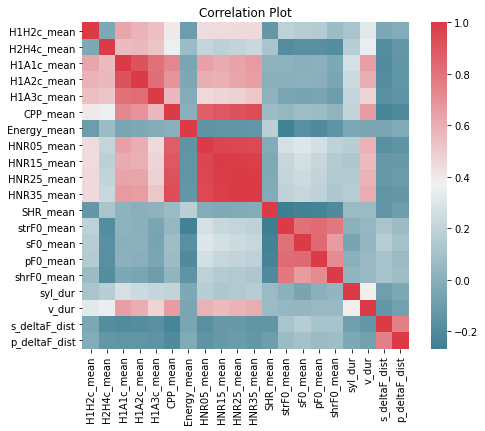

In [37]:
fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
pca_subset_scaled = scaler.fit_transform(pca_subset)

Check if dataset meets statistical assumptions appropriate for PCA -- Bartlett's Test should return a significant p-value (<0.05) and the KMO Test should return a value greater than 0.6

In [39]:
# Bartlett's Test, prints the chi square value and associated p-value
fa.calculate_bartlett_sphericity(pca_subset_scaled)

(737185.2086058832, 0.0)

In [40]:
fa.calculate_kmo(pca_subset_scaled)[1] # index of 1 returns the overall KMO value

C:\Users\atarv\Anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.827969435416886

Project the data onto as many principal components needed to explain 90% of the variance.

In [41]:
from sklearn.decomposition import PCA
pca_spectilt = PCA(0.9)
principalComponents_spectilt = pca_spectilt.fit_transform(pca_subset_scaled)
print("number of components: ", principalComponents_spectilt.shape[1])

number of components:  8


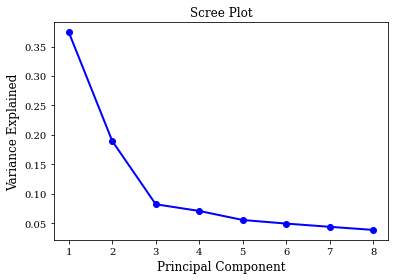

In [42]:
PC_values = np.arange(pca_spectilt.n_components_) + 1
tex_fonts = {
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 12,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
}
plt.rcParams.update(tex_fonts)
plt.figure(figsize=(6,4))
plt.plot(PC_values, pca_spectilt.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.savefig('figures/scree_spectilt.jpg', format='jpg', dpi = 800)
plt.show()

Three components will be used, following the elbow method.

In [43]:
pca_spectilt = PCA(n_components = 3)
principalComponents_spectilt = pca_spectilt.fit_transform(pca_subset_scaled)

In [47]:
principal_spectilt_df = pd.DataFrame(data = principalComponents_spectilt,
                                columns = ['dur_period', 'f0_spectilt', 'vowel_periph'])
print('Explained variation per principal component: {}'.format(pca_spectilt.explained_variance_ratio_))

Explained variation per principal component: [0.37437834 0.18952883 0.0821957 ]


In [48]:
# join with larger data set
df_pca = principal_spectilt_df.join(df)
df_pca.head()

,dur_period,f0_spectilt,vowel_periph,Filename,Label,H1H2c_mean,H2H4c_mean,H1A1c_mean,H1A2c_mean,H1A3c_mean,...,partID,Language,t1_wd,t2_wd,word,stress,syl_dur,v_dur,s_deltaF_dist,p_deltaF_dist
0,-2.082444,1.975650,-0.034860,afs116_catala_exp2_a.mat,i,0.000,0.000,0.000,0.000,0.000,...,afs116,cat,5.502012,6.2491,eliminar,0,0.145897,0.071737,0.512598,0.486584
1,4.574169,3.367847,0.113006,afs116_catala_exp2_a.mat,a,8.178,-7.852,22.533,4.996,7.536,...,afs116,cat,5.502012,6.2491,eliminar,1,0.369100,0.274665,0.282309,0.449074
2,3.266917,2.909851,1.798802,afs116_catala_exp2_a.mat,i,0.926,-0.275,21.573,10.235,-14.295,...,afs116,cat,10.850600,12.0906,discriminar,0,0.220000,0.114457,0.507155,0.911324
3,5.502514,3.287846,0.004269,afs116_catala_exp2_a.mat,a,7.587,-3.805,23.928,8.507,7.348,...,afs116,cat,10.850600,12.0906,discriminar,1,0.550000,0.300000,0.252006,0.421455
4,4.762114,2.906207,1.791160,afs116_catala_exp2_a.mat,i,5.218,-4.662,15.659,13.086,-10.113,...,afs116,cat,40.617489,42.1002,encaminar,0,0.333645,0.198018,0.485937,0.923083


In [49]:
loadings = pca_spectilt.components_.T * np.sqrt(pca_spectilt.explained_variance_)
loading_matrix = pd.DataFrame(loadings, columns=['duration_periodicity', 'f0_spectilt', 'vowel_peripherality'], index=pca_subset.columns)
loading_matrix

,duration_periodicity,f0_spectilt,vowel_peripherality
H1H2c_mean,0.584468,0.070078,0.211635
H2H4c_mean,0.395446,-0.437555,0.040533
H1A1c_mean,0.857532,-0.243393,0.142473
H1A2c_mean,0.832579,-0.252812,0.150706
H1A3c_mean,0.707444,-0.304747,0.153821
CPP_mean,0.918842,-0.116181,-0.050992
Energy_mean,-0.129978,-0.291448,-0.040380
HNR05_mean,0.911413,0.148601,-0.065799
HNR15_mean,0.907008,0.124725,-0.022673
HNR25_mean,0.921042,0.103219,0.003533


In [50]:
df_pca.columns

Index(['dur_period', 'f0_spectilt', 'vowel_periph', 'Filename', 'Label',
       'H1H2c_mean', 'H2H4c_mean', 'H1A1c_mean', 'H1A2c_mean', 'H1A3c_mean',
       'CPP_mean', 'Energy_mean', 'HNR05_mean', 'HNR15_mean', 'HNR25_mean',
       'HNR35_mean', 'SHR_mean', 'strF0_mean', 'sF0_mean', 'pF0_mean',
       'shrF0_mean', 'partID', 'Language', 't1_wd', 't2_wd', 'word', 'stress',
       'syl_dur', 'v_dur', 's_deltaF_dist', 'p_deltaF_dist'],
      dtype='object')

In [51]:
df_pca.drop(['H1H2c_mean', 'H2H4c_mean', 'H1A1c_mean', 'H1A2c_mean',
            'H1A3c_mean', 'CPP_mean', 'Energy_mean', 'HNR05_mean',
             'HNR15_mean', 'HNR25_mean', 'HNR35_mean', 'SHR_mean',
             'strF0_mean', 'sF0_mean', 'pF0_mean', 'shrF0_mean',
             'strF0_mean', 'syl_dur', 'v_dur', 's_deltaF_dist', 'p_deltaF_dist'],
            axis = 1, inplace = True)

In [52]:
df_pca.to_csv("data/data_bigPCA.csv", index = False)

In [54]:
df_pca.groupby(['Language']).count()/2

,dur_period,f0_spectilt,vowel_periph,Filename,Label,partID,t1_wd,t2_wd,word,stress
Language,,,,,,,,,,
cat,3648.0,3648.0,3648.0,3648.0,3648.0,3648.0,3648.0,3648.0,3648.0,3648.0
eng,6879.0,6879.0,6879.0,6879.0,6879.0,6879.0,6879.0,6879.0,6879.0,6879.0
spa,3461.0,3461.0,3461.0,3461.0,3461.0,3461.0,3461.0,3461.0,3461.0,3461.0


In [55]:
len(df_pca)/2

13988.0

# Prepare for logreg in R

In [56]:
df = pd.read_csv("data/data_bigPCA.csv")

In [57]:
df['syllable'] = np.where((df['Label']=="i") | (df['Label']=="pen"), 'pen', 'ult')

In [58]:
parts = pd.read_csv("../blp/data/parts.csv")
parts['partID'] = parts['partID'].map(str.lower)

In [59]:
df_lang = pd.merge(df, parts, on = "partID", how = "left")
df_lang.head()

,dur_period,f0_spectilt,vowel_periph,Filename,Label,partID,Language,t1_wd,t2_wd,word,stress,syllable,lang_profile
0,-2.082444,1.975650,-0.034860,afs116_catala_exp2_a.mat,i,afs116,cat,5.502012,6.2491,eliminar,0,pen,l1_eng
1,4.574169,3.367847,0.113006,afs116_catala_exp2_a.mat,a,afs116,cat,5.502012,6.2491,eliminar,1,ult,l1_eng
2,3.266917,2.909851,1.798802,afs116_catala_exp2_a.mat,i,afs116,cat,10.850600,12.0906,discriminar,0,pen,l1_eng
3,5.502514,3.287846,0.004269,afs116_catala_exp2_a.mat,a,afs116,cat,10.850600,12.0906,discriminar,1,ult,l1_eng
4,4.762114,2.906207,1.791160,afs116_catala_exp2_a.mat,i,afs116,cat,40.617489,42.1002,encaminar,0,pen,l1_eng


In [60]:
blp_pca = pd.read_csv("../blp/data/pca_blp.csv")
blp_pca.drop(['lang_profile'], axis = 1, inplace = True)
df_blp = pd.merge(df_lang, blp_pca, on="partID", how = "left")

In [61]:
df_blp.drop(['Filename', 't1_wd', 't2_wd'], axis = 1, inplace = True)

In [62]:
df_blp.to_csv("data/big_PCA_forR.csv", index = False)